In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Fetch historical stock data for Apple Inc. (AAPL)
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Show the first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458560  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355828  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344076  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386253  7.570714  7.571429  7.466429  7.510714  447610800


In [ ]:
# Create a new column that shows the stock price movement (1 for up, 0 for down)
stock_data['Price Up'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

# Use additional features like moving average
stock_data['Moving Average 50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Moving Average 200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=50).std()

# Drop rows with NaN values created by rolling
stock_data = stock_data.dropna()

# Show the new columns
print(stock_data[['Close', 'Moving Average 50', 'Moving Average 200', 'Volatility', 'Price Up']].head())


Price           Close Moving Average 50 Moving Average 200 Volatility Price Up
Ticker           AAPL                                                         
Date                                                                          
2010-10-18  11.357143          9.659357           8.767198   0.760904        0
2010-10-19  11.053214          9.693457           8.784248   0.784515        1
2010-10-20  11.090357          9.729971           8.801418   0.806333        0
2010-10-21  11.054286          9.772350           8.819016   0.819296        0
2010-10-22  10.981071          9.812121           8.836318   0.828877        1


In [ ]:
# Features (X) - Using historical price, moving averages, and volatility
X = stock_data[['Close', 'Moving Average 50', 'Moving Average 200', 'Volatility']]

# Target (y) - Whether the stock price goes up (1) or down (0)
y = stock_data['Price Up']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.49      0.06      0.11       299
           1       0.51      0.94      0.66       316

    accuracy                           0.51       615
   macro avg       0.50      0.50      0.39       615
weighted avg       0.50      0.51      0.39       615

Accuracy: 51.22%


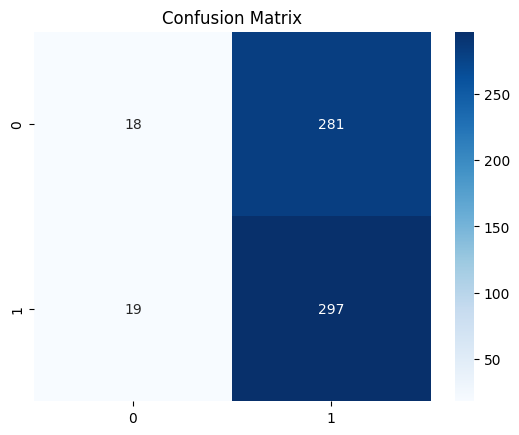

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix (optional)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


[*********************100%***********************]  1 of 1 completed


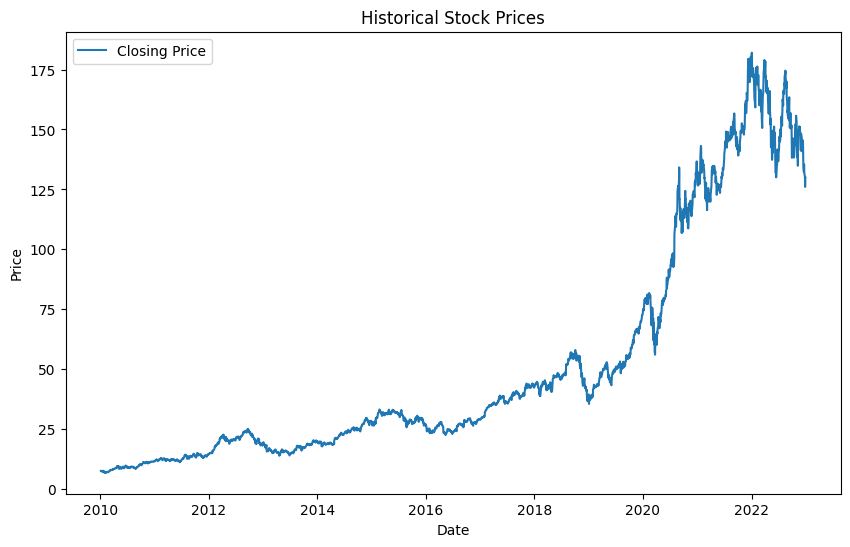

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

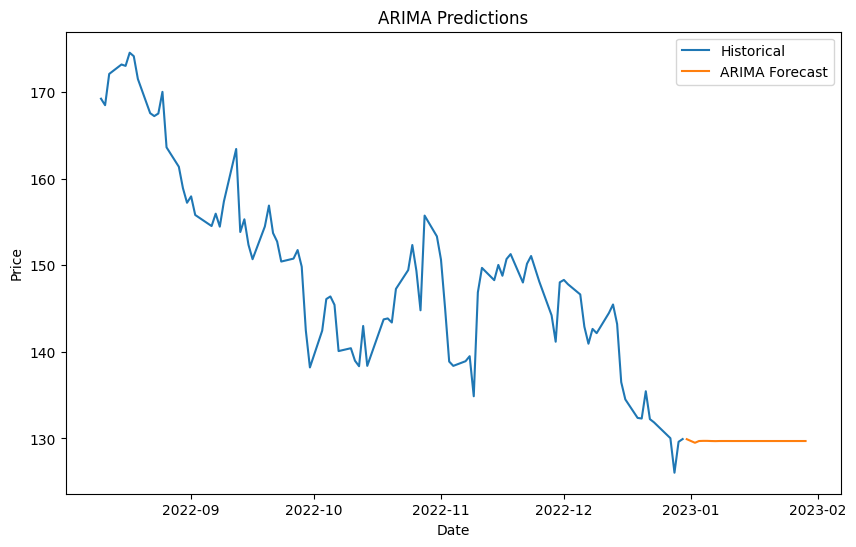

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 841.4356
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 212.1168
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 22.4901
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 8.1869
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 3.6286
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2.4356
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.5754
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.3205
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.8798
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.8550
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


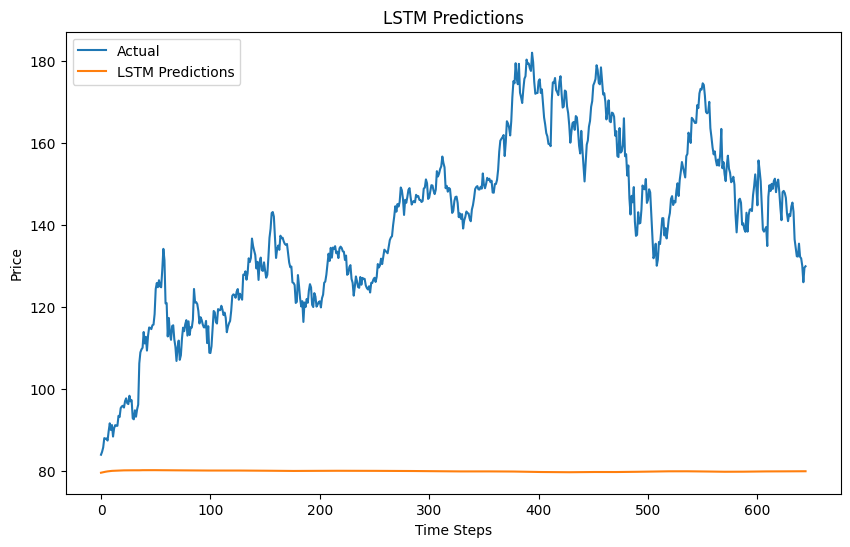

Linear Regression RMSE: 0.00
Linear Regression MAE: 0.00


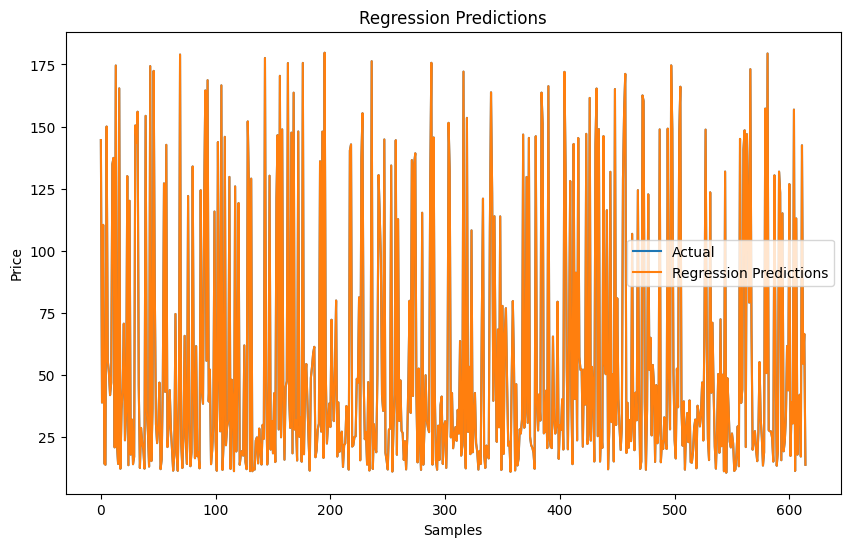

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Fetch historical stock data for Apple Inc. (AAPL)
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Visualize the closing price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for ARIMA
arima_data = stock_data['Close']

# Fit ARIMA model
arima_model = ARIMA(arima_data, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast the next 30 days
arima_forecast = arima_result.forecast(steps=30)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(arima_data[-100:], label='Historical')
plt.plot(arima_data.index[-1] + pd.to_timedelta(np.arange(1, 31), unit='D'), arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for LSTM
lstm_data = stock_data[['Close']]
lstm_data = lstm_data.values

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 50
X_lstm, y_lstm = create_sequences(lstm_data, sequence_length)

# Split data into training and testing sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=10, verbose=1)

# Predict using LSTM
lstm_predictions = lstm_model.predict(X_test_lstm)

# Plot LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title('LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for regression
stock_data['Moving Average 50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Moving Average 200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=50).std()

# Drop NaN values created by rolling calculations
stock_data = stock_data.dropna()

# Features (X) and target (y)
X = stock_data[['Close', 'Moving Average 50', 'Moving Average 200', 'Volatility']]
y = stock_data['Close']

# Split data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict using the regression model
reg_predictions = reg_model.predict(X_test)

# Evaluate regression model
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_predictions))
reg_mae = mean_absolute_error(y_test, reg_predictions)
print(f"Linear Regression RMSE: {reg_rmse:.2f}")
print(f"Linear Regression MAE: {reg_mae:.2f}")

# Plot regression predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(reg_predictions, label='Regression Predictions')
plt.title('Regression Predictions')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()
